In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression


In [0]:
from google.colab import files
files.upload()

Saving Social_Network_Ads.csv to Social_Network_Ads.csv


{'Social_Network_Ads.csv': b'User ID,Gender,Age,EstimatedSalary,Purchased\r\n15624510,Male,19,19000,0\r\n15810944,Male,35,20000,0\r\n15668575,Female,26,43000,0\r\n15603246,Female,27,57000,0\r\n15804002,Male,19,76000,0\r\n15728773,Male,27,58000,0\r\n15598044,Female,27,84000,0\r\n15694829,Female,32,150000,1\r\n15600575,Male,25,33000,0\r\n15727311,Female,35,65000,0\r\n15570769,Female,26,80000,0\r\n15606274,Female,26,52000,0\r\n15746139,Male,20,86000,0\r\n15704987,Male,32,18000,0\r\n15628972,Male,18,82000,0\r\n15697686,Male,29,80000,0\r\n15733883,Male,47,25000,1\r\n15617482,Male,45,26000,1\r\n15704583,Male,46,28000,1\r\n15621083,Female,48,29000,1\r\n15649487,Male,45,22000,1\r\n15736760,Female,47,49000,1\r\n15714658,Male,48,41000,1\r\n15599081,Female,45,22000,1\r\n15705113,Male,46,23000,1\r\n15631159,Male,47,20000,1\r\n15792818,Male,49,28000,1\r\n15633531,Female,47,30000,1\r\n15744529,Male,29,43000,0\r\n15669656,Male,31,18000,0\r\n15581198,Male,31,74000,0\r\n15729054,Female,27,137000,1\r\n1

In [0]:
data =  pd.read_csv("Social_Network_Ads.csv")

In [16]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [17]:
data.shape

(400, 5)

In [0]:
x = data.iloc[:,[2,3]].values
y = data.iloc[:,4].values


In [0]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train, Y_test = train_test_split(x,y,test_size=.25, random_state= 0)


In [0]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  =sc.transform(X_test)


In [21]:
#fitting logistic regression to the training set
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
#predicting the test set results
y_pred = classifier.predict(X_test)


In [29]:
#making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,y_pred)
print(cm)

[[65  3]
 [ 8 24]]


In [0]:
#predict proba
y_prob = classifier.predict_proba(X_test)

In [0]:
y_predicted_probability=y_prob[:,1]

In [34]:
y_predicted_probability>0.4

array([False, False, False, False, False, False, False,  True, False,
        True, False, False, False, False, False, False, False, False,
        True, False, False,  True, False,  True, False,  True, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False,  True, False, False, False, False,  True,
       False, False,  True, False,  True,  True, False, False,  True,
        True, False, False, False,  True, False, False,  True, False,
       False, False,  True, False, False, False,  True,  True, False,
       False, False, False, False,  True, False,  True,  True,  True,
        True, False, False,  True,  True,  True,  True,  True, False,
        True,  True, False, False, False, False, False,  True,  True,
        True])

In [0]:
#to calculate proba score and change 
y_predict_2 = (y_predicted_probability>0.45).astype(int)


In [0]:
from sklearn.metrics import accuracy_score

In [49]:
accuracy_score(Y_test,y_predict_2)

0.9

(array([33., 11.,  2.,  6.,  2.,  6.,  4.,  2.,  4.,  3.,  2.,  3.,  0.,
         0.,  3.,  1.,  1.,  5.,  3.,  9.]),
 array([0.00197809, 0.05167851, 0.10137892, 0.15107933, 0.20077974,
        0.25048016, 0.30018057, 0.34988098, 0.39958139, 0.44928181,
        0.49898222, 0.54868263, 0.59838304, 0.64808346, 0.69778387,
        0.74748428, 0.79718469, 0.84688511, 0.89658552, 0.94628593,
        0.99598634]),
 <a list of 20 Patch objects>)

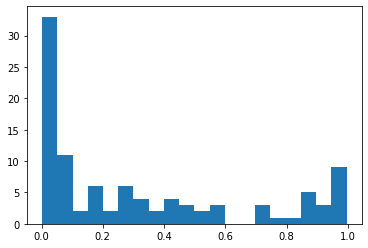

In [50]:
plt.hist(y_predicted_probability, bins=20)

In [0]:
from sklearn.metrics import f1_score,auc

In [52]:
f1_score(Y_test,y_predict_2)

0.8387096774193549

In [53]:
f1_score(Y_test,y_pred)

0.8135593220338982

In [0]:
#89%accracy achieved

In [0]:
#visualising train and test results
from matplotlib.colors import ListedColormap
X_set,Y_set = X_train,Y_train
X1,X2 = np.meshgrid(np.arange(start =X_set[:,0].min()-1, stop = X_set[:,0].max() +1, step =0.01),
                    np.arange(start = X_set[:,1].min()-1,stop = X_set[:,1].max()
                    +1, step = 0.01)))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


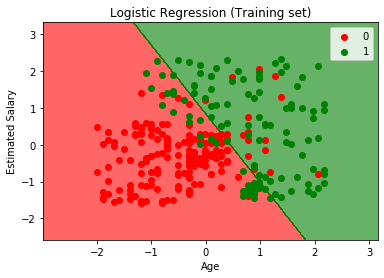

In [26]:
from matplotlib.colors import ListedColormap
X_set, Y_set = X_train, Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.6, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


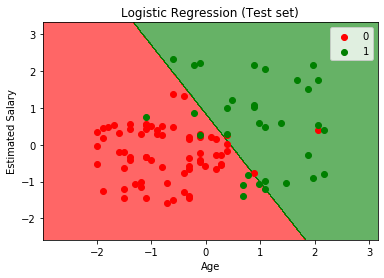

In [28]:
# Visualizing the Test set results
from matplotlib.colors import ListedColormap
X_set, Y_set = X_test, Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.6, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()